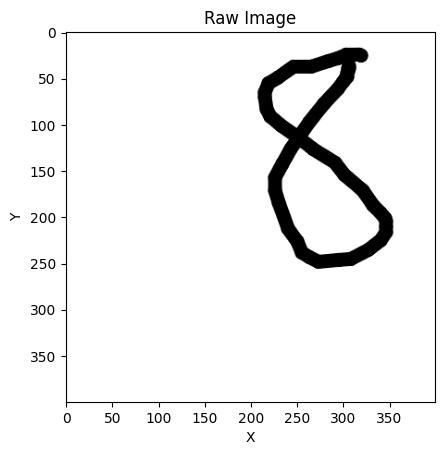

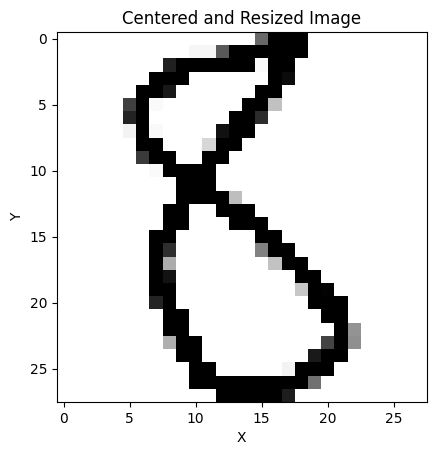

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images with x and y labels
def show_image_with_labels(title, image, xlabel='X', ylabel='Y', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Function to preprocess images: cut the digit, remove padding, and center it
def preprocess_and_center_image(image, target_size=(28, 28)):
    if image is None or image.size == 0:
        raise ValueError("Image not loaded correctly or is empty.")

    # Invert the image (make digits white and background black) for easier processing
    inverted_image = cv2.bitwise_not(image)

    # Find all non-white (non-zero) pixels in the inverted image
    coords = cv2.findNonZero(inverted_image)  # Get all non-white points
    x, y, w, h = cv2.boundingRect(coords)  # Find the bounding box around the digit

    # Crop the image around the bounding box
    cropped_image = image[y:y+h, x:x+w]

    # Create a blank square canvas larger than the digit to center it
    canvas_size = max(w, h)  # Make sure the canvas is a square large enough for the digit
    centered_image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255  # White background

    # Calculate the offset to place the cropped digit in the center of the canvas
    x_offset = (canvas_size - w) // 2
    y_offset = (canvas_size - h) // 2

    # Place the cropped digit onto the center of the canvas
    centered_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

    # Resize the centered image to the target size (28x28)
    resized_image = cv2.resize(centered_image, target_size)

    return resized_image

# Load the image
image_path = '8.png'  # Path to your test image
raw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if raw_image is None:
    raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the path.")

# Preprocess: Cut the digit, remove padding, and center it
centered_resized_image = preprocess_and_center_image(raw_image)

# Show raw image and centered, resized image
show_image_with_labels("Raw Image", raw_image)
show_image_with_labels("Centered and Resized Image", centered_resized_image)



Epoch 1/10


210/210 [==============================] - 4s 13ms/step - loss: 1.0507 - accuracy: 0.6897 - val_loss: 0.3764 - val_accuracy: 0.8885
Epoch 2/10
210/210 [==============================] - 2s 11ms/step - loss: 0.2882 - accuracy: 0.9126 - val_loss: 0.2710 - val_accuracy: 0.9159
Epoch 3/10
210/210 [==============================] - 2s 12ms/step - loss: 0.1781 - accuracy: 0.9480 - val_loss: 0.1855 - val_accuracy: 0.9422
Epoch 4/10
210/210 [==============================] - 3s 14ms/step - loss: 0.1245 - accuracy: 0.9606 - val_loss: 0.2164 - val_accuracy: 0.9374
Epoch 5/10
210/210 [==============================] - 3s 16ms/step - loss: 0.0939 - accuracy: 0.9696 - val_loss: 0.1542 - val_accuracy: 0.9529
Epoch 6/10
210/210 [==============================] - 4s 18ms/step - loss: 0.0710 - accuracy: 0.9775 - val_loss: 0.1303 - val_accuracy: 0.9612
Epoch 7/10
210/210 [==============================] - 4s 18ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.1160 - val_accuracy: 0.9

C:\Users\nicol\.conda\envs\computervision\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


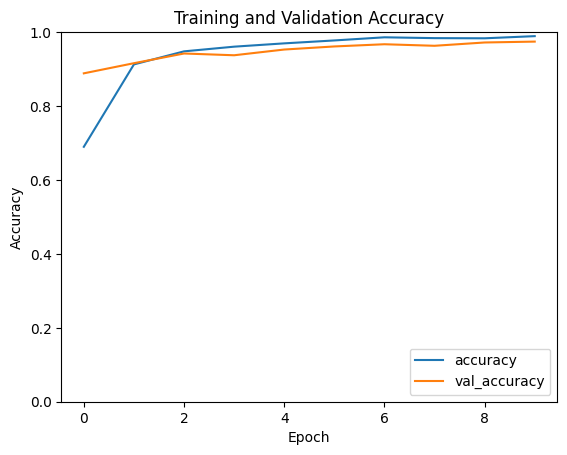

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to preprocess images: cut the digit, remove padding, and center it
def preprocess_and_center_image(image, target_size=(28, 28)):
    if image is None or image.size == 0:
        return None  # Skip invalid images
    
    # Invert the image (make digits white and background black) for easier processing
    inverted_image = cv2.bitwise_not(image)

    # Find all non-white (non-zero) pixels in the inverted image
    coords = cv2.findNonZero(inverted_image)  # Get all non-white points
    x, y, w, h = cv2.boundingRect(coords)  # Find the bounding box around the digit

    # Crop the image around the bounding box
    cropped_image = image[y:y+h, x:x+w]

    # Create a blank square canvas larger than the digit to center it
    canvas_size = max(w, h)  # Make sure the canvas is a square large enough for the digit
    centered_image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255  # White background

    # Calculate the offset to place the cropped digit in the center of the canvas
    x_offset = (canvas_size - w) // 2
    y_offset = (canvas_size - h) // 2

    # Place the cropped digit onto the center of the canvas
    centered_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

    # Resize the centered image to the target size (28x28)
    resized_image = cv2.resize(centered_image, target_size)

    return resized_image

# Function to load and preprocess the entire dataset
def load_and_preprocess_dataset(data_dir, target_size=(28, 28)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Ensure consistent class order
    class_to_label = {name: idx for idx, name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Load only valid image types
                image_path = os.path.join(class_dir, file_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                if image is not None:
                    processed_image = preprocess_and_center_image(image, target_size=target_size)
                    if processed_image is not None:
                        images.append(processed_image)
                        labels.append(class_to_label[class_name])
    
    images = np.array(images).reshape(-1, target_size[0], target_size[1], 1)  # Add channel dimension
    labels = np.array(labels)
    
    return images, labels, class_names

# Load and preprocess the dataset
data_dir = 'C:/Users/nicol/Documents/MSC_AI_DS/computer vision/CV-Block-Week-Sept-2024/project/dataset/'
images, labels, class_names = load_and_preprocess_dataset(data_dir)

# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Step 3: Define the CNN model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the CNN model
input_shape = (28, 28, 1)
num_classes = len(class_names)
model = build_model(input_shape, num_classes)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Save the trained model
model.save('cnn_centered.h5')

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()



53/53 [==============================] - 1s 8ms/step
Validation Accuracy: 97.44%


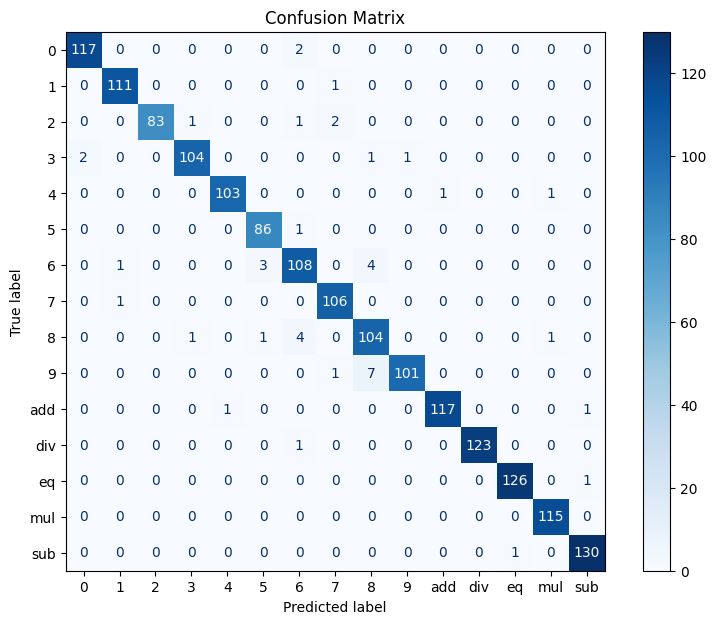

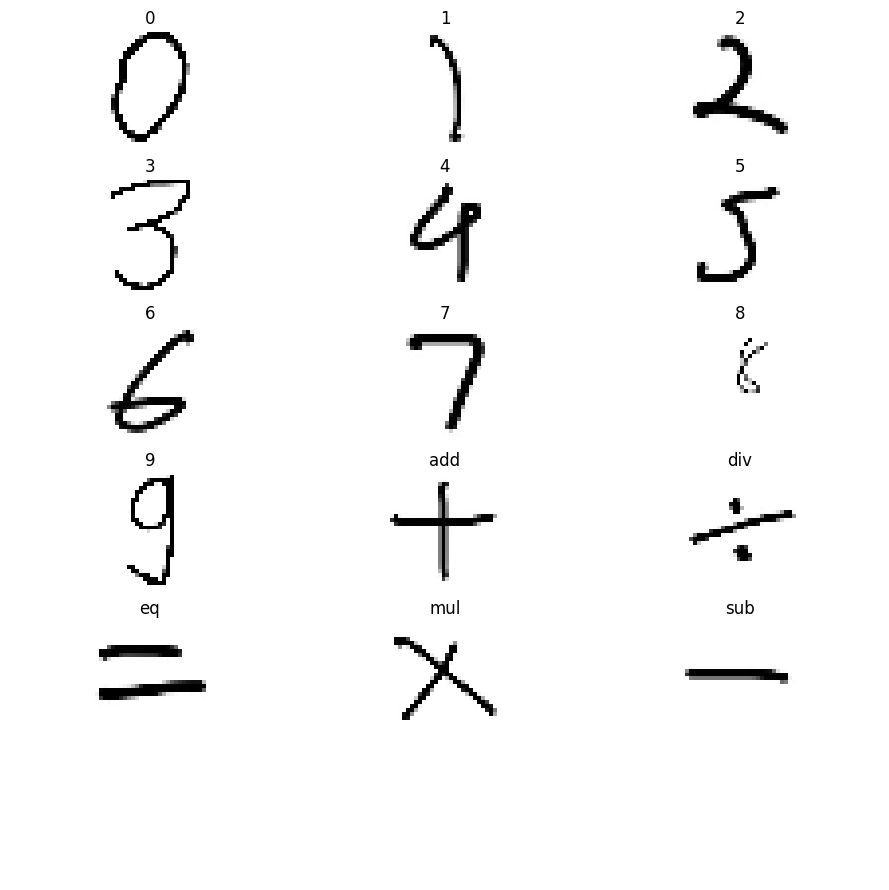

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import cv2

# Use the already trained model: model
# Use the validation data: X_val, y_val

# Predict the labels for the validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred, labels=range(len(class_names)))

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Function to plot one resized image per class
def plot_resized_images_by_class(X_val, y_val, class_names):
    fig, axes = plt.subplots(nrows=len(class_names) // 3 + 1, ncols=3, figsize=(9, 9))
    axes = axes.flatten()

    for class_idx in range(len(class_names)):
        # Find the first image of each class in the validation set
        idx = np.where(y_val == class_idx)[0][0]
        image = X_val[idx].reshape(28, 28)  # Reshape to 28x28 if needed
        axes[class_idx].imshow(image, cmap='gray')
        axes[class_idx].set_title(class_names[class_idx])
        axes[class_idx].axis('off')

    # Turn off any remaining empty axes (if we have fewer classes than plot slots)
    for ax in axes[len(class_names):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Plot one resized image per class
plot_resized_images_by_class(X_val, y_val, class_names)


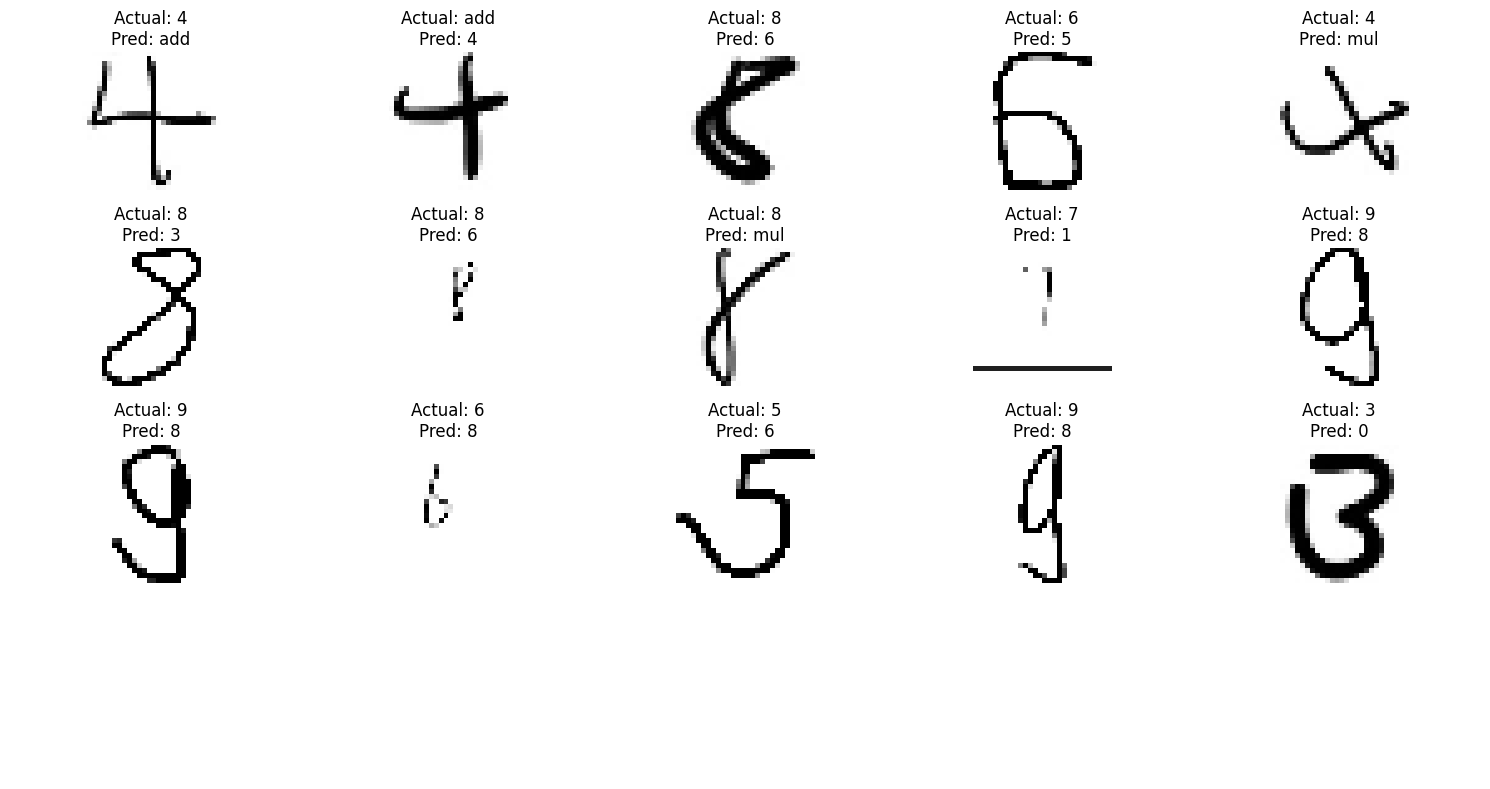

In [15]:
def plot_misclassifications(X_val, y_val, y_pred, class_names, num_images=15):
    # Find indices of misclassified samples
    misclassified_indices = np.where(y_val != y_pred)[0]
    
    # Select up to `num_images` random misclassifications to plot
    num_images = min(num_images, len(misclassified_indices))
    selected_indices = np.random.choice(misclassified_indices, num_images, replace=False)
    
    # Plot misclassified images
    fig, axes = plt.subplots(nrows=num_images // 5 + 1, ncols=5, figsize=(15, 8))
    axes = axes.flatten()

    for i, idx in enumerate(selected_indices):
        image = X_val[idx].reshape(28, 28)  # Reshape if images are 28x28
        actual_label = class_names[y_val[idx]]
        predicted_label = class_names[y_pred[idx]]

        # Plot image with actual/predicted labels
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Actual: {actual_label}\nPred: {predicted_label}")
        axes[i].axis('off')
    
    # Turn off any remaining empty axes
    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot misclassified images with actual/predicted labels
plot_misclassifications(X_val, y_val, y_pred, class_names)


1/1 [==============================] - 0s 39ms/step


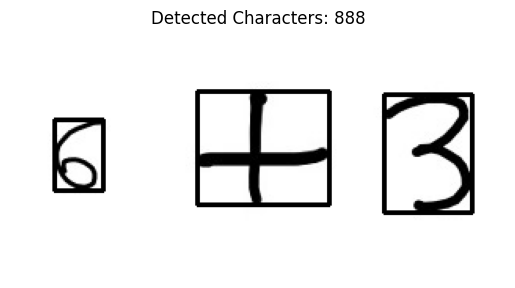

Recognized Expression: 888


In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('cnn_centered.h5')

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'div', 'eq', 'mul', 'sub']

# Function to preprocess and center the detected digit/symbol
def preprocess_and_center_image(image, target_size=(28, 28)):
    inverted_image = cv2.bitwise_not(image)
    coords = cv2.findNonZero(inverted_image)
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = image[y:y+h, x:x+w]

    canvas_size = max(w, h)
    centered_image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255
    x_offset = (canvas_size - w) // 2
    y_offset = (canvas_size - h) // 2
    centered_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image
    resized_image = cv2.resize(centered_image, target_size)

    return resized_image

# Function to detect and classify symbols/digits from the image
def detect_and_classify(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours (detected symbols/digits)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sort from left to right

    # Store the recognized characters
    recognized_characters = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        detected_obj = binary[y:y+h, x:x+w]

        # Preprocess the detected object
        preprocessed_obj = preprocess_and_center_image(detected_obj)

        # Normalize and prepare for model prediction
        input_image = preprocessed_obj.astype('float32') / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)

        # Predict the class using the trained model
        prediction = model.predict(input_image)
        predicted_class = np.argmax(prediction)

        # Store the predicted character and draw bounding box
        recognized_characters.append(class_names[predicted_class])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, class_names[predicted_class], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the detected and labeled image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Characters: " + ''.join(recognized_characters))
    plt.axis('off')
    plt.show()

    return recognized_characters

# Run detection and classification
detected_characters = detect_and_classify('test1.jpg', model)
print(f"Recognized Expression: {''.join(detected_characters)}")


1/1 [==============================] - 0s 33ms/step


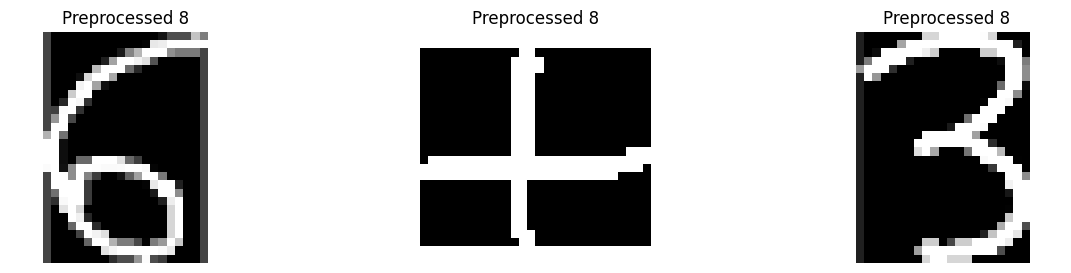

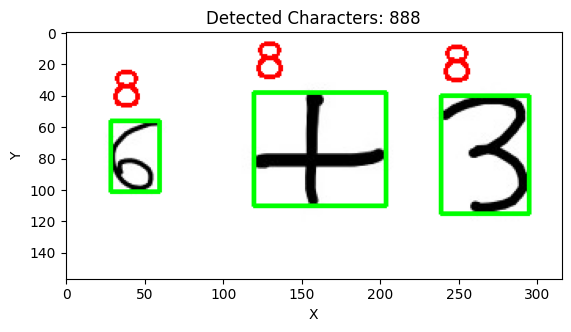

Recognized Expression: 888


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('cnn_centered.h5')

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '/', '=', '*', '-']

# Function to preprocess and center the detected digit/symbol
def preprocess_and_center_image(image, target_size=(28, 28)):
    inverted_image = cv2.bitwise_not(image)
    coords = cv2.findNonZero(inverted_image)
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = image[y:y+h, x:x+w]

    canvas_size = max(w, h)
    centered_image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255
    x_offset = (canvas_size - w) // 2
    y_offset = (canvas_size - h) // 2
    centered_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image
    resized_image = cv2.resize(centered_image, target_size)

    return resized_image

# Function to detect and classify symbols/digits from the image, and plot preprocessed images
def detect_and_classify(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours (detected symbols/digits)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sort from left to right

    # Store the recognized characters
    recognized_characters = []
    filtered_contours = []

    # Visualize contour detection
    debug_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # To store preprocessed images for plotting
    preprocessed_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)

        # Filter out contours that are too small or too large or aspect ratio not in range
        if 10 < w < 100 and 10 < h < 100 and 0.2 < aspect_ratio < 2.0:
            filtered_contours.append(contour)

    # Classify each filtered contour and plot preprocessed images
    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        detected_obj = binary[y:y+h, x:x+w]

        # Preprocess the detected object
        preprocessed_obj = preprocess_and_center_image(detected_obj)
        preprocessed_images.append(preprocessed_obj)

        # Normalize and prepare for model prediction
        input_image = preprocessed_obj.astype('float32') / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)

        # Predict the class using the trained model
        prediction = model.predict(input_image)
        predicted_class = np.argmax(prediction)

        # Store the predicted character and draw bounding box with label
        recognized_characters.append(class_names[predicted_class])
        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, class_names[predicted_class], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Plot the preprocessed images
    fig, axes = plt.subplots(nrows=1, ncols=len(preprocessed_images), figsize=(15, 3))
    for idx, pre_img in enumerate(preprocessed_images):
        axes[idx].imshow(pre_img, cmap='gray')
        axes[idx].set_title(f'Preprocessed {recognized_characters[idx]}')
        axes[idx].axis('off')

    plt.show()

    # Plot the image with x and y axis and labeled bounding boxes
    fig, ax = plt.subplots()
    ax.imshow(debug_img, cmap='gray')
    ax.set_title("Detected Characters: " + ''.join(recognized_characters))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

    return recognized_characters

# Run detection and classification
detected_characters = detect_and_classify('test1.jpg', model)
print(f"Recognized Expression: {''.join(detected_characters)}")


1/1 [==============================] - 0s 40ms/step


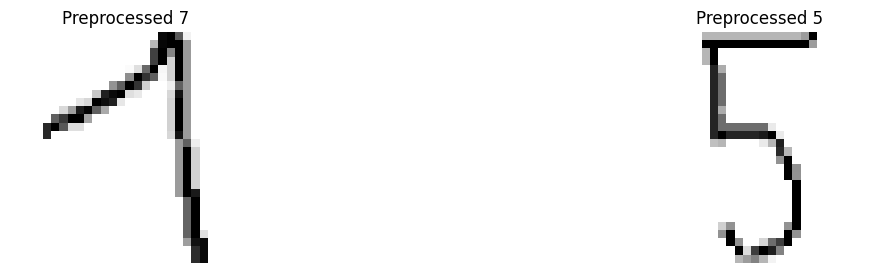

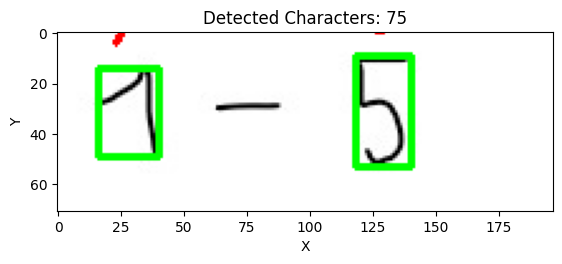

Recognized Expression: 75


In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('cnn_centered.h5')

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '/', '=', '*', '-']

# Function to preprocess and center the detected digit/symbol while maintaining aspect ratio
def preprocess_and_center_image(image, target_size=(28, 28)):
    # Invert the image colors (make digits black on a white background)
    image = cv2.bitwise_not(image)
    
    coords = cv2.findNonZero(image)
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = image[y:y+h, x:x+w]

    # Calculate aspect ratio and padding needed to make the image square
    aspect_ratio = w / h
    if w > h:
        pad_top_bottom = (w - h) // 2
        pad_left_right = 0
    else:
        pad_top_bottom = 0
        pad_left_right = (h - w) // 2

    # Add padding to make the image square
    padded_image = cv2.copyMakeBorder(
        cropped_image,
        pad_top_bottom, pad_top_bottom, pad_left_right, pad_left_right,
        cv2.BORDER_CONSTANT, value=255  # Ensure white background
    )

    # Resize the padded image to the target size (28x28)
    resized_image = cv2.resize(padded_image, target_size)

    return resized_image

# Function to detect and classify symbols/digits from the image, and plot preprocessed images
def detect_and_classify(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours (detected symbols/digits)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])  # Sort from left to right

    # Store the recognized characters
    recognized_characters = []
    filtered_contours = []

    # Visualize contour detection
    debug_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # To store preprocessed images for plotting
    preprocessed_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)

        # Filter out contours that are too small or too large or aspect ratio not in range
        if 10 < w < 100 and 10 < h < 100 and 0.2 < aspect_ratio < 2.0:
            filtered_contours.append(contour)

    # Classify each filtered contour and plot preprocessed images
    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        detected_obj = binary[y:y+h, x:x+w]

        # Preprocess the detected object (inverts color and resizes)
        preprocessed_obj = preprocess_and_center_image(detected_obj)
        preprocessed_images.append(preprocessed_obj)

        # Normalize and prepare for model prediction
        input_image = preprocessed_obj.astype('float32') / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)

        # Predict the class using the trained model
        prediction = model.predict(input_image)
        predicted_class = np.argmax(prediction)

        # Store the predicted character and draw bounding box with label
        recognized_characters.append(class_names[predicted_class])
        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, class_names[predicted_class], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Plot the preprocessed images
    fig, axes = plt.subplots(nrows=1, ncols=len(preprocessed_images), figsize=(15, 3))
    for idx, pre_img in enumerate(preprocessed_images):
        axes[idx].imshow(pre_img, cmap='gray')
        axes[idx].set_title(f'Preprocessed {recognized_characters[idx]}')
        axes[idx].axis('off')

    plt.show()

    # Plot the image with x and y axis and labeled bounding boxes
    fig, ax = plt.subplots()
    ax.imshow(debug_img, cmap='gray')
    ax.set_title("Detected Characters: " + ''.join(recognized_characters))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

    return recognized_characters

# Run detection and classification
detected_characters = detect_and_classify('test2.jpg', model)
print(f"Recognized Expression: {''.join(detected_characters)}")


1/1 [==============================] - 0s 30ms/step


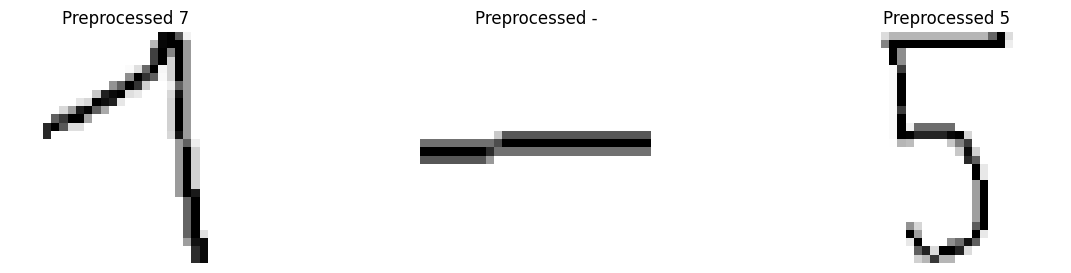

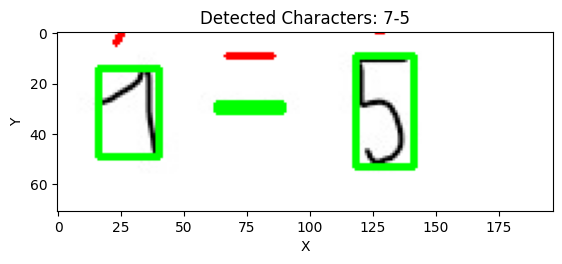

Recognized Expression: 7-5


In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('cnn_centered.h5')

# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '/', '=', '*', '-']

# Function to preprocess and center the detected digit/symbol while maintaining aspect ratio
def preprocess_and_center_image(image, target_size=(28, 28)):
    image = cv2.bitwise_not(image)
    coords = cv2.findNonZero(image)
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = image[y:y+h, x:x+w]

    if w > h:
        pad_top_bottom = (w - h) // 2
        pad_left_right = 0
    else:
        pad_top_bottom = 0
        pad_left_right = (h - w) // 2

    padded_image = cv2.copyMakeBorder(
        cropped_image,
        pad_top_bottom, pad_top_bottom, pad_left_right, pad_left_right,
        cv2.BORDER_CONSTANT, value=255
    )
    resized_image = cv2.resize(padded_image, target_size)
    return resized_image

# Function to detect and classify symbols/digits with additional processing for the '-' symbol
def detect_and_classify(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

    # Enhance horizontal lines to detect '-' symbol more reliably
    kernel_horizontal = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_horizontal)
    
    # Combine enhanced horizontal lines with the original binary image
    combined_binary = cv2.bitwise_or(binary, horizontal_lines)

    # Find contours in the combined binary image
    contours, _ = cv2.findContours(combined_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    recognized_characters = []
    filtered_contours = []
    debug_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    preprocessed_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)

        # Custom filtering for '-' symbol and other symbols
        if (w > 20 and h < 15 and aspect_ratio > 2) or (10 < w < 100 and 10 < h < 100 and 0.1 < aspect_ratio < 5.0):
            filtered_contours.append(contour)

    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        detected_obj = combined_binary[y:y+h, x:x+w]

        # Preprocess the detected object
        preprocessed_obj = preprocess_and_center_image(detected_obj)
        preprocessed_images.append(preprocessed_obj)

        # Prepare the object for model prediction
        input_image = preprocessed_obj.astype('float32') / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)

        # Predict the class using the trained model
        prediction = model.predict(input_image)
        predicted_class = np.argmax(prediction)

        # Store the predicted character and draw bounding box with label
        recognized_characters.append(class_names[predicted_class])
        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, class_names[predicted_class], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Plot the preprocessed images
    fig, axes = plt.subplots(nrows=1, ncols=len(preprocessed_images), figsize=(15, 3))
    for idx, pre_img in enumerate(preprocessed_images):
        axes[idx].imshow(pre_img, cmap='gray')
        axes[idx].set_title(f'Preprocessed {recognized_characters[idx]}')
        axes[idx].axis('off')

    plt.show()

    # Plot the final detected and labeled image
    fig, ax = plt.subplots()
    ax.imshow(debug_img, cmap='gray')
    ax.set_title("Detected Characters: " + ''.join(recognized_characters))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

    return recognized_characters

# Run detection and classification
detected_characters = detect_and_classify('test2.jpg', model)
print(f"Recognized Expression: {''.join(detected_characters)}")


Epoch 1/3
17/17 [==============================] - 1s 9ms/step - loss: 2.3485 - accuracy: 0.3188
Epoch 2/3
17/17 [==============================] - 0s 10ms/step - loss: 1.4569 - accuracy: 0.6195
Epoch 3/3
262/262 [==============================] - 1s 2ms/step_ 0.352 _ 0.351 _ 0.347 _ 0.344 _ 0.340 _ 0.337 _ 0.331 _ 0.326 _ 0.319 _ 0.315 _ 0.308 _ 0.305 _ 0.300 _ 0.295 _ 0.289 _ 0.288 _ 0.284 _ 0.278 _ 0.276 _ 0.273 _ 0.269 _ 0.267 _ 0.264 _ 0.260 _ 0.257 _ 0.256 _ 0.252 _ 0.249 _ 0.249 _ 0.247 _ 0.246 _ 0.243 _ 0.241 _ 0.239 _ 0.238 _ 0.236 _ 0.235 _ 0.231 _ 0.231 _ 0.230 _ 0.228 _ 0.225 _ 0.225 _ 0.223 _ 0.221 _ 0.221 _ 0.220 _ 0.217 _ 0.218 _ 0.215 _ 0.215 _ 0.213 _ 0.212 _ 0.211 _ 0.209 _ 0.210 _ 0.207 _ 0.207 _ 0.205 _ 0.205 _ 0.204 _ 0.204 _ 0.202 _ 0.202 _ 0.201 _ 0.200 _ 0.198 _ 0.198 _ 0.196 _ 0.197 _ 0.196 _ 0.195 _ 0.193 _ 0.194 _ 0.193 _ 0.193 _ 0.192 _ 0.192 _ 0.192 _ 0.191 _ 0.190 _ 0.189 _ 0.187 _ 0.186 _ 0.187 _ 0.188 _ 0.186 _ 0.185 _ 0.185 _ 0.185 _ 0.1


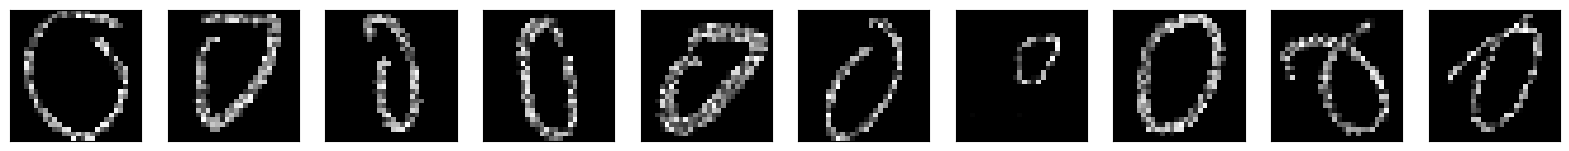

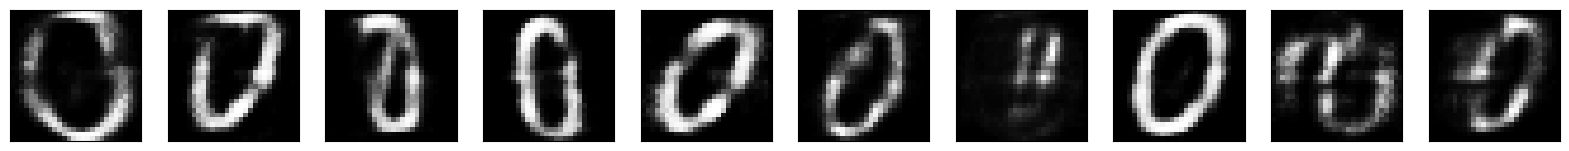

262/262 [==============================] - 1s 3ms/step - loss: 1.1210 - accuracy: 0.6560
Accuracy on denoised images: 0.6560114622116089
262/262 [==============================] - 1s 2ms/step


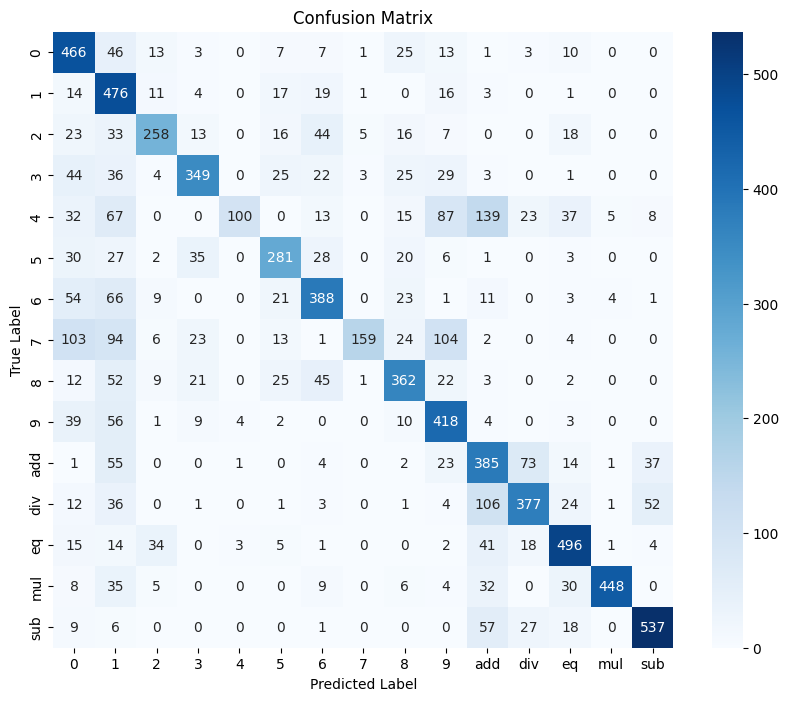

In [80]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Funktion zur Vorverarbeitung der Bilder
def preprocess_and_center_image(image, target_size=(28, 28)):
    inverted_image = cv2.bitwise_not(image)
    coords = cv2.findNonZero(inverted_image)
    x, y, w, h = cv2.boundingRect(coords)
    cropped_image = image[y:y+h, x:x+w]

    canvas_size = max(w, h)
    centered_image = np.ones((canvas_size, canvas_size), dtype=np.uint8) * 255
    x_offset = (canvas_size - w) // 2
    y_offset = (canvas_size - h) // 2
    centered_image[y_offset:y_offset+h, x_offset:x_offset+w] = cropped_image

    resized_image = cv2.resize(centered_image, target_size)
    return resized_image

# Laden und Vorbereiten des Datensatzes
def load_and_preprocess_dataset(data_dir, target_size=(28, 28)):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))
    class_to_label = {name: idx for idx, name in enumerate(class_names)}
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_dir, file_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    processed_image = preprocess_and_center_image(image, target_size=target_size)
                    images.append(processed_image)
                    labels.append(class_to_label[class_name])
    
    images = np.array(images).reshape(-1, target_size[0] * target_size[1]) / 255.0  # Flatten & normalize
    labels = np.array(labels)
    return images, labels, class_names

# Datensatzpfad angeben
data_dir = 'C:/Users/nicol/Documents/MSC_AI_DS/computer vision/CV-Block-Week-Sept-2024/project/dataset/'
x_train, y_train, class_names = load_and_preprocess_dataset(data_dir)
x_test, y_test, _ = load_and_preprocess_dataset(data_dir)  # Annahme: gleiche Struktur für Testdaten

# Rauschen hinzufügen
noise_factor = 0.9
x_train_noisy = x_train + np.random.rand(*x_train.shape) * noise_factor
x_test_noisy = x_test + np.random.rand(*x_test.shape) * noise_factor
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot-Funktion
def plot(images, predictions=None, labels=False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(predictions[i]) if predictions is not None else "")
    plt.show()

# Klassifikator-Definition
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(28 * 28,)),
    Dense(256, activation='relu'),
    Dense(len(class_names), activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Klassifikator-Training
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

# Autoencoder-Definition
input_image = Input(shape=(28 * 28,))
encoded = Dense(128, activation='relu')(input_image)
decoded = Dense(28 * 28, activation='sigmoid')(encoded)
autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Autoencoder-Training
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e, l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

# Denoised Bilder vorhersagen
denoised_test_images = autoencoder.predict(x_test_noisy)
plot(x_test_noisy, None)
plot(denoised_test_images, None)

# Denoised Bilder klassifizieren
loss, accuracy = classifier.evaluate(denoised_test_images, y_test)
print('Accuracy on denoised images:', accuracy)

# Konfusionsmatrix berechnen und anzeigen
predicted_labels = np.argmax(classifier.predict(denoised_test_images), axis=1)
conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 29ms/step


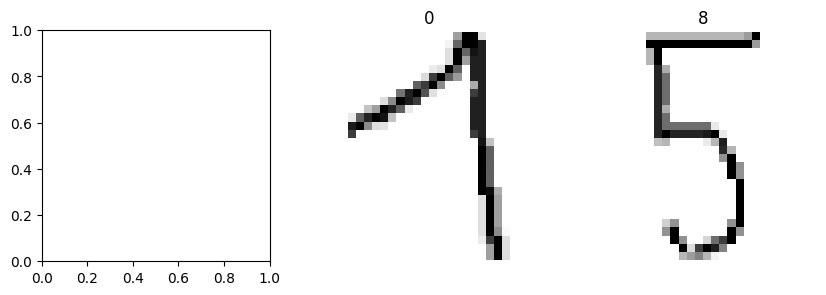

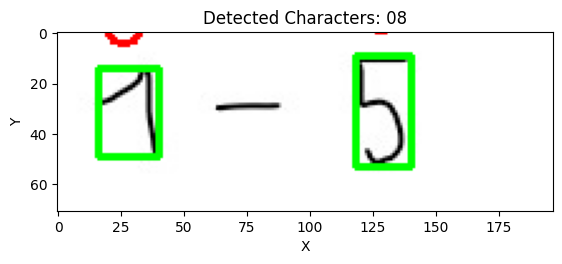

Recognized Expression: 08


In [85]:

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/']  # Beispielklassen

# Erkennungsrahmen im Originalbild anzeigen
debug_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2BGR)
recognized_characters = []

# Plot-Vorbereitung für die Einzelobjekte
fig, axes = plt.subplots(1, len(contours), figsize=(10, 3))
axes = axes.flatten()  # Für den Fall, dass nur eine Kontur vorhanden ist

for idx, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filtere kleine oder unbrauchbare Konturen heraus
    if w > 10 and h > 10:
        detected_obj = binary_image[y:y+h, x:x+w]

        # Invertiere das Objekt für die Klassifikation
        inverted_obj = cv2.bitwise_not(detected_obj)

        # Vorverarbeitung der erkannten Region
        preprocessed_obj = preprocess_and_center_image(inverted_obj)
        
        # Vorverarbeitung der erkannten Region und Umformen für den Autoencoder
        input_image = preprocessed_obj.astype('float32') / 255.0
        input_image = input_image.reshape((1, 28 * 28))  # Zu einem flachen Vektor umformen
        
        # Rekonstruktion mit dem Autoencoder
        reconstructed_obj = autoencoder.predict(input_image)
        
        # Forme die rekonstruierten Daten zu einem flachen Vektor für die Klassifikation
        reconstructed_obj = reconstructed_obj.reshape((1, 28 * 28))
        
        # Klassifizieren der rekonstruierten Ziffer/Symbol
        prediction = classifier.predict(reconstructed_obj)
        predicted_class = np.argmax(prediction)
        recognized_characters.append(class_names[predicted_class])


        
        # Zeichnen eines Rahmens und der Vorhersage
        cv2.rectangle(debug_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_image, class_names[predicted_class], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
        # Einzelobjekt anzeigen
        axes[idx].imshow(preprocessed_obj, cmap='gray')
        axes[idx].set_title(f"{class_names[predicted_class]}")
        axes[idx].axis('off')

# Anzeige des Gesamtergebnisses
plt.show()

# Anzeige des Originalbilds mit allen Erkennungsrahmen und Beschriftungen
plt.figure()
plt.imshow(debug_image, cmap='gray')
plt.title("Detected Characters: " + ''.join(recognized_characters))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Ausgabe der erkannten Zeichen
print(f"Recognized Expression: {''.join(recognized_characters)}")